# ***Proyecto final***

*Encuesta satisfaccion de clientes de una aerolinea*

---



In [ ]:
# Importacion de las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Lectura del archivo
df = pd.read_csv("/content/Encuesta satisfaccion aerolinea.csv", sep=';')

# Visualizacion de las 3 primeras filas del archivo
df.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [ ]:
#Eljo una paleta de colores predeterminada
color = 'Spectral_r' # set palette color (from PALETTE_COLOR)
sns.set_palette(color) # set palette

# ***Data Wrangling***
*Información de la base de datos*

---

In [ ]:
# Tamaño del archivo
print('El archivo tiene ' + str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas')

In [ ]:
# Identificacion de tipos de variables y el recuento de no nulos 
df.info()

In [ ]:
# Visualizacion de las columnas
df.columns

In [ ]:
# Eliminacion de los campos indispensables y renombre de la columna Leg room service
df = df.drop(['Unnamed: 0', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient'], axis=1)
df = df.set_index('id', drop=True, append=False, inplace=False) #Pongo el id como indice
df.rename(columns={'Leg room service':'Seat space'}, inplace=True) #Cambio los nombres de las columnas
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Seat space,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
id,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,3,4,3,4,3,5,5,5,5,2,5,5,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,3,1,5,4,5,4,4,4,4,3,4,5,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,2,4,2,2,2,2,4,1,3,2,2,2,neutral or dissatisfied


In [ ]:
# Visualizacion de las columnas del nuevo data frame
print(df.columns)
print('')
print('El archivo tiene ' + str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas')

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Seat space',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction'],
      dtype='object')

El archivo tiene 25976 filas y 20 columnas


In [ ]:
# Revision de valores misssings o nulos 
df.isnull().sum()

In [ ]:
# Agrupacion de campos por tipo de dato
col_numerica = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Seat space', 
'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

col_categorica = ['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']

variables= ['Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort','Inflight entertainment',  
'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

In [ ]:
# Descripcion de las variables numericas
df[col_numerica].describe().T

In [ ]:
# Descripcion de las variables categoricas
df[col_categorica].describe().T

,count,unique,top,freq
Gender,25976,2,Female,13172
Customer Type,25976,2,Loyal Customer,21177
Type of Travel,25976,2,Business travel,18038
Class,25976,3,Business,12495
satisfaction,25976,2,neutral or dissatisfied,14573


In [ ]:
for x in col_categorica:
   frecuencia_valores = df[x].value_counts()
   print(frecuencia_valores)

In [ ]:
# Visualizacion del recuento de respuestas
for x in variables:
   frecuencia_valores = df[x].value_counts()
   print(frecuencia_valores)

In [ ]:
# Creo un nuevo dataframe
df2 = df

# Uso LabelEncoder para convertir las variables categóricas en numéricas
from sklearn.preprocessing import LabelEncoder

for c in col_categorica:
    print(str(c))
    le = LabelEncoder()
    le.fit(df2[str(c)])
    df2[str(c)]=le.transform(df2[str(c)]) 

Gender
Customer Type
Type of Travel
Class
satisfaction


In [ ]:
for x in col_categorica:
   frecuencia_valores = df2[x].value_counts()
   print(frecuencia_valores)

0    13172
1    12804
Name: Gender, dtype: int64
0    21177
1     4799
Name: Customer Type, dtype: int64
0    18038
1     7938
Name: Type of Travel, dtype: int64
0    12495
1    11564
2     1917
Name: Class, dtype: int64
0    14573
1    11403
Name: satisfaction, dtype: int64


In [ ]:
# Agrupacion de campos por tipo de dato
variables_total = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness',
                   'Gender', 'Customer Type', 'Type of Travel','Class','satisfaction'] # Se asignan todos los campos requeridos a una unica variable

# ***Análisis de la base de datos***

---

*Analisis univariado*

---



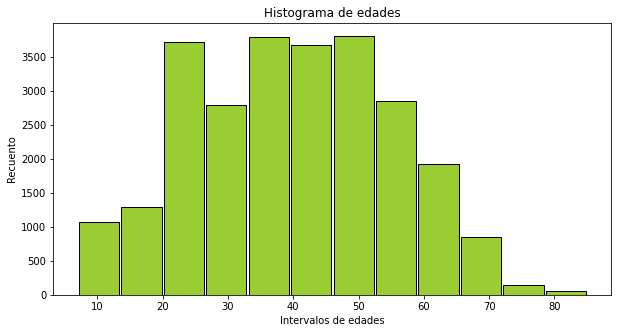

In [ ]:
# Distribucion de edades
datos = df['Age'] #asignacion de la columna edad a una variable
datos_norm = datos.values.flatten() #normalizacion de los datos
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(datos_norm, bins=12, rwidth=0.95, edgecolor='black', color='yellowgreen') # se grafican los valores 
ax.set_title('Histograma de edades') #se pone titulo al grafico
ax.set_xlabel('Intervalos de edades') #se pone nombre al eje x
ax.set_ylabel('Recuento') #se pone nombre al eje x
plt.savefig('Customed Plot.pdf', dpi=300, bbox_inches='tight') #Guardamos el grafico

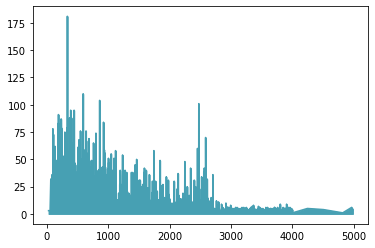

In [ ]:
# Distancia de vuelos
df['Flight Distance'].value_counts().sort_index().plot.area() # Se cuentan los vuelos que tienen misma distancia y se grafica

In [ ]:
# Analisis de todos los parametros de la encuesta

# Funcion for para iterar sobre todos los campos
for x in variables: 
  plt.title(df[x].name) # Asignacion de titulo al grafico
  sns.boxplot(x=df[x], palette='Blues'); # Asignacion de color y variable al grafico box plot
  plt.show() # Para mostrar todos los graficos

In [ ]:
# Visualizacion de la satisfaccion
df['satisfaction'].value_counts().sort_index().plot(kind ='bar')

*Analisis bivariado*

---



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


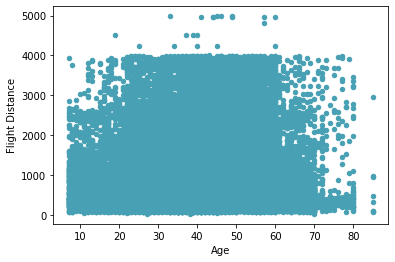

In [ ]:
# Relacion entre edad y longitud del vuelo
df.plot.scatter(x='Age', y='Flight Distance')

In [ ]:
# Se visualiza la relacion entre la edad y otras variables categoricas

# Se asignan todos los campos requeridos a una unica variable
col_categorica = ['Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']

# Se arma un for para analizar todas los campos de la nueva variable creada
for x in col_categorica: 
   plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
   sns.boxplot(df[x], df['Age']) # Se grafica un campo de la nueva variable contra el campo Edad
   plt.title('Relación entre Age y ' + str(df[x].name), fontsize = 15) # Se agrega el titulo al grafico
   plt.show()

In [ ]:
# Se visualiza la relacion entre la satisfacción y otras variables numéricas

# Se asignan todos los campos requeridos a una unica variable
variables_total = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Gate location','Food and drink', 'Online boarding','Seat comfort',
                   'Inflight entertainment', 'On-board service', 'Seat space', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness',
                   'Gender', 'Customer Type', 'Type of Travel','Class','satisfaction']

# Se arma un for para analizar todas los campos de la nueva variable creada
for x in variables_total: 
   plt.figure(figsize=(5,5)) # Se fija el tamaño de grafico
   sns.boxplot(df['satisfaction'], df2[x]) # Se grafica un campo de la nueva variable contra el campo Edad
   plt.title('Relación entre la satisfacción y ' + str(df2[x].name), fontsize = 15) # Se agrega el titulo al grafico
   plt.show()

La mayor diferencia se encuentra en la comodidad del asiento, si el asiento es cómodo es la satisfacción tiende a ser mayor

*Analisis multivariado*

---



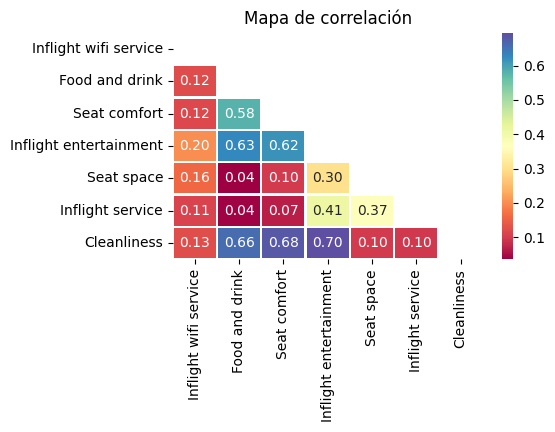

In [ ]:
# Visualizacion de la matriz de correlacion, en donde se busca encontrar alguna correlacion entre las variables de la encuesta
variables_vuelo= ['Inflight wifi service','Food and drink','Seat comfort','Inflight entertainment', 'Seat space', 'Inflight service', 'Cleanliness'] # Se asignan todos los campos requeridos a una unica variable

plt.figure(dpi = 100,figsize= (5,3)) # Se asigna el tamaño de la figura
mask = np.triu(np.ones_like(df[variables_vuelo].corr(),dtype = bool)) # Se seleccionan solo los datos debajo de la diagonal del mapa con la funcion triu 
sns.heatmap(df[variables_vuelo].corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'Spectral') # Se grafica el mapa de calor
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlación') # Se agrega titulo al mapa
plt.show() # Se visualiza el mapa

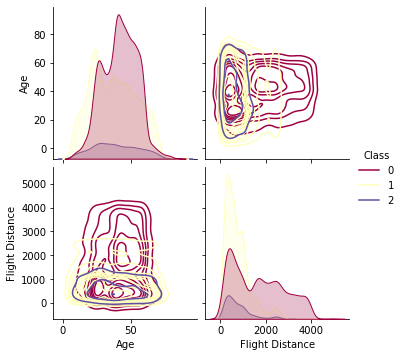

In [ ]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target clase
df_relacion = df.loc[:, ['Age','Class','Flight Distance']] # Se seleccionan los campos requeridos del data frame
sns.pairplot(df_relacion ,hue = 'Class', palette = 'Spectral', kind="kde") # Se grafica en pairplot con el target clase para trazar relaciones por pares entre las variables edad y distancia de vuelo

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


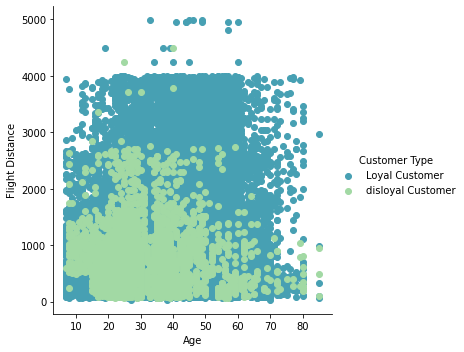

In [ ]:
# Visualizacion de la relacion entre Flight Distance y Age a traves del target tipo de cliente
sns.FacetGrid(df, hue = 'Customer Type' , size = 5).map(plt.scatter,'Age','Flight Distance').add_legend(); 
plt.show() # Se visualiza el mapa

# ***Algoritmos de clasificación***

---



In [ ]:
#Importo las librerías
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[df2[variables_total].columns.difference(['satisfaction'])]
y = df2['satisfaction']

In [ ]:
#Separo el dataset en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training y 30% testing

print(f'Train shape : {X_train.shape}')
print(f'Test shape  : {X_test.shape}\n')

Train shape : (18183, 19)
Test shape  : (7793, 19)



*K-Nearest Neighbours*

---

In [ ]:
#Importo MinMaxScaler para escalear los conjuntos de entrenamiento
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

([<matplotlib.axis.XTick at 0x7fc401515190>,
 <a list of 21 Text major ticklabel objects>)

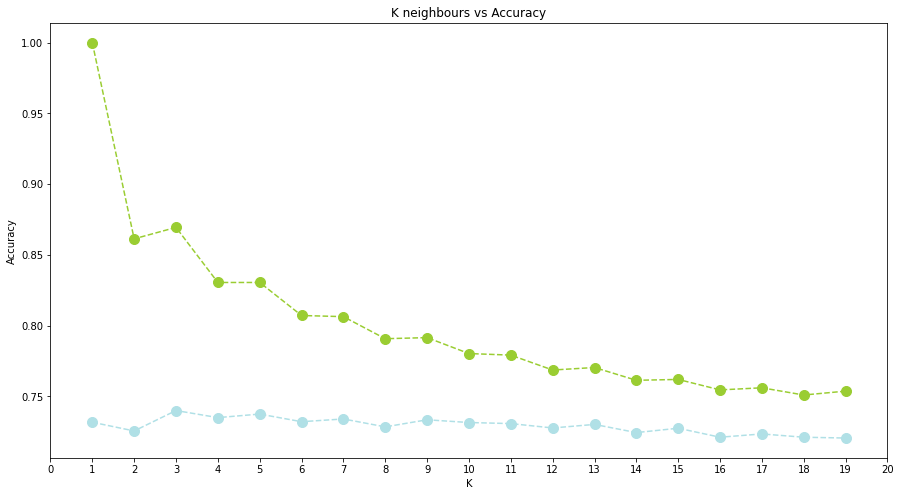

In [ ]:
#Importo la librería para el algoritmo de clasificación
from sklearn.neighbors import KNeighborsClassifier

#Utilizo la tecnica de tecnica de Grid Search para validar el K óptimo
k_range = range(1, 20)
scores_train= []
scores_test= []
for k in k_range:
    clas_knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clas_knn.fit(X_train, y_train)
    scores_train.append(clas_knn.score(X_train, y_train))
    scores_test.append(clas_knn.score(X_test, y_test))

plt.figure(figsize=(15,8))
plt.plot(k_range, scores_train, color='yellowgreen', linestyle='dashed', marker='o',markerfacecolor='yellowgreen', markersize=10)
plt.plot(k_range, scores_test, color='powderblue', linestyle='dashed', marker='o',markerfacecolor='powderblue', markersize=10)
plt.title('K neighbours vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [ ]:
#El valor minimo optimo de vecinos es k = 3 que llega a una Accuracy del 89% para la data de Testing
n_neighbors = 3

#Consideraer que la distancia entre vecinos es con el parametro 'metric'probemos con otras distancia Minkowski 
clas_knn = KNeighborsClassifier(n_neighbors, metric = 'minkowski')
clas_knn.fit(X_train, y_train)

accuracy_train_knn = clas_knn.score(X_train, y_train)
accuracy_test_knn = clas_knn.score(X_test, y_test)

print('El Accuracy Train del modelo es de: {:.2f}'
      .format(accuracy_train_knn))
print('El Accuracy Test del modelo es de: {:.2f}'
      .format(accuracy_test_knn))

El Accuracy Train del modelo es de: 0.87
El Accuracy Test del modelo es de: 0.74


In [ ]:
#Creo la variable de predicción en función de la respuesta del test
y_train_pred_knn = clas_knn.predict(X_train)
y_test_pred_knn = clas_knn.predict(X_test)

Matriz de Confusión: 
 [[2336  576]
 [ 763 1521]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


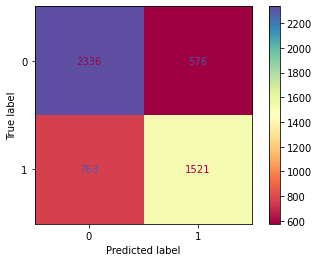

In [ ]:
#Creamos la matriz de confusión para KNN
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_knn)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusión
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clas_knn, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')

In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_knn)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_knn)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_knn)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_knn)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_knn)}')

El Accuracy del modelo es de: 0.7423017705927637

La Precision del modelo es de: 0.7253218884120172

El Recall del modelo es de: 0.6659369527145359

El valor de F1 del modelo es de: 0.6943620178041543


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.75      0.80      0.78      2912
           1       0.73      0.67      0.69      2284

    accuracy                           0.74      5196
   macro avg       0.74      0.73      0.74      5196
weighted avg       0.74      0.74      0.74      5196



*Arbol de decision*

---

In [ ]:
#Invoco el clasificador para el albol de decision
from sklearn.tree import DecisionTreeClassifier
clas_dt = DecisionTreeClassifier()

#Entreno el clasificador
clas_dt.fit(X_train, y_train)

#Creo la variable de predicción en función de la respuesta del test
y_train_pred_dt = clas_dt.predict(X_train)
y_test_pred_dt = clas_dt.predict(X_test)

Matriz de Confusión: 
 [[2712  200]
 [ 159 2125]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


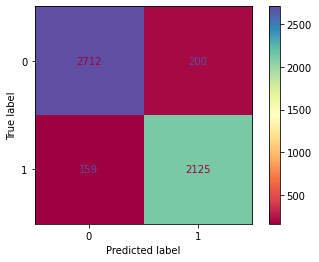

In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_dt)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusión
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clas_dt, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')

In [ ]:
#Me fijo el accuracy del modelo
from sklearn import metrics
accuracy_train_dt = metrics.accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = metrics.accuracy_score(y_test, y_test_pred_dt)                               
print("El Accuracy Train del modelo es de:",accuracy_train_dt)
print("El Accuracy Test del modelo es de:",accuracy_test_dt)

El Accuracy Train del modelo es de: 1.0
El Accuracy Test del modelo es de: 0.9309083910700539


In [ ]:
#Comparamos el modelo del árbol de desición con knn
print('El árbol de desición es ' + str(accuracy_test_dt-accuracy_test_knn) + '% mas preciso que knn')

El árbol de desición es 0.18860662047729015% mas preciso que knn


In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_dt)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_dt)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_dt)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_dt)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_dt)}')

El Accuracy del modelo es de: 0.9309083910700539

La Precision del modelo es de: 0.9139784946236559

El Recall del modelo es de: 0.930385288966725

El valor de F1 del modelo es de: 0.9221089173356475


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.94      0.93      0.94      2912
           1       0.91      0.93      0.92      2284

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196



*Random Forest*

---

In [ ]:
#Creamos el random forest y lo entrenamos con las variables de entrenamiento
from sklearn.ensemble import RandomForestClassifier

clas_rd = RandomForestClassifier(random_state=11, 
                                  n_estimators=200,
                                  class_weight="balanced", 
                                  max_features="log2")
clas_rd.fit(X_train, y_train)

#Realizamos una predicción con la variable de test
y_test_pred_rd = clas_rd.predict(X_test) 

#Calculamos la precision del random forest
from sklearn.metrics import accuracy_score
accuracy_test_rd = accuracy_score(y_test, y_test_pred_rd)
print('% de aciertos sobre el set de evaluación:',accuracy_test_rd)

% de aciertos sobre el set de evaluación: 0.9545804464973057


In [ ]:
#Comparamos el modelo del árbol de desición y knn con random forest
print('El random forest es ' + str(accuracy_test_rd-accuracy_test_dt) + '% mas preciso que el arbol de decision simple y ' 
      + str(accuracy_test_rd-accuracy_test_knn) + '% mas preciso que knn' )

El random forest es 0.023672055427251815% mas preciso que el arbol de decision simple y 0.21227867590454197% mas preciso que knn


Matriz de Confusión: 
 [[2824   88]
 [ 148 2136]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


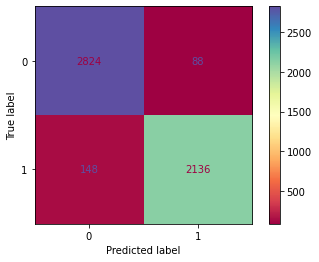

In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_rd)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusion
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clas_rd, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')

In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_rd)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_rd)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_rd)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_rd)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_rd)}')

El Accuracy del modelo es de: 0.9545804464973057

La Precision del modelo es de: 0.960431654676259

El Recall del modelo es de: 0.9352014010507881

El valor de F1 del modelo es de: 0.9476486246672582


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2912
           1       0.96      0.94      0.95      2284

    accuracy                           0.95      5196
   macro avg       0.96      0.95      0.95      5196
weighted avg       0.95      0.95      0.95      5196



*Support Vector Machine's*

---

In [ ]:
#Invoco el clasificador para el SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clas_svc = SVC()

#Entreno el clasificador
clas_svc.fit(X_train, y_train)

#Creo la variable de predicción en función de la respuesta del test
y_test_pred_svc = clas_svc.predict(X_test)

Matriz de Confusión: 
 [[2456  456]
 [1314  970]] 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


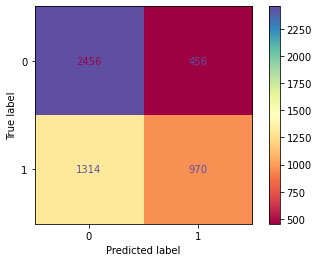

In [ ]:
#Creamos la matriz de confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_svc)
print(f'Matriz de Confusión: \n {matriz} \n')

#Graficamos la matriz de confusion
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clas_svc, 
                      X = X_test, 
                      y_true = y_test, 
                      colorbar=True, 
                      cmap='Spectral')

In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Accuracy
print(f"El Accuracy del modelo es de: {accuracy_score(y_test, y_test_pred_svc)}\n")

# Precision
print(f"La Precision del modelo es de: {precision_score(y_test, y_test_pred_svc)}\n")

# Recall
print(f"El Recall del modelo es de: {recall_score(y_test,y_test_pred_svc)}\n")

# F1 score
print(f"El valor de F1 del modelo es de: {f1_score(y_test, y_test_pred_svc)}\n\n")

#Reporte de clasificación
print(f'Reporte de clasificación: \n\n {classification_report(y_test, y_test_pred_svc)}')

El Accuracy del modelo es de: 0.6593533487297921

La Precision del modelo es de: 0.6802244039270687

El Recall del modelo es de: 0.4246935201401051

El valor de F1 del modelo es de: 0.522911051212938


Reporte de clasificación: 

               precision    recall  f1-score   support

           0       0.65      0.84      0.74      2912
           1       0.68      0.42      0.52      2284

    accuracy                           0.66      5196
   macro avg       0.67      0.63      0.63      5196
weighted avg       0.66      0.66      0.64      5196



In [ ]:
#Importo las librerias para calcular las metricas de Accuracy, Presicion, Recall y F1
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print("            KNN      DT      RF     SVC")

# Accuracy
print(f"Accuracy    {round(accuracy_score(y_test, y_test_pred_knn),2)}    {round(accuracy_score(y_test, y_test_pred_dt),2)}    {round(accuracy_score(y_test, y_test_pred_rd),2)}    {round(accuracy_score(y_test, y_test_pred_svc),2)}")

# Precision
print(f"Precision   {round(precision_score(y_test, y_test_pred_knn),2)}    {round(precision_score(y_test, y_test_pred_dt),2)}    {round(precision_score(y_test, y_test_pred_rd),2)}    {round(precision_score(y_test, y_test_pred_svc),2)}")

# Recall
print(f"Recall      {round(recall_score(y_test,y_test_pred_knn),2)}    {round(recall_score(y_test,y_test_pred_dt),2)}    {round(recall_score(y_test,y_test_pred_rd),2)}    {round(recall_score(y_test,y_test_pred_svc),2)}")

# F1 score
print(f"F1          {round(f1_score(y_test, y_test_pred_knn),2)}     {round(f1_score(y_test, y_test_pred_dt),2)}    {round(f1_score(y_test, y_test_pred_rd),2)}    {round(f1_score(y_test, y_test_pred_svc),2)}")

            KNN      DT      RF     SVC
Accuracy    0.74    0.93    0.95    0.66
Precision   0.73    0.91    0.96    0.68
Recall      0.67    0.93    0.94    0.42
F1          0.69     0.92    0.95    0.52


Analizando todos los modelos, el que mejor se ajusta a los datos es el modelo de Random Forest.

*Regresión lineal*

---

In [ ]:
from sklearn.linear_model import LinearRegression

clas_lr = LinearRegression()
clas_lr.fit(X_train, y_train) 

y_train_pred_lr = clas_lr.predict(X_train)
y_test_pred_lr = clas_lr.predict (X_test)

LinearRegression()

In [ ]:
def score():
    print(f'Scores:')
    print(f'Train      = {clas_lr.score(X_train, y_train):.4}')
    print(f'Validation = {clas_lr.score(X_test, y_test):.4}')

score()

Scores:
Train      = 0.5393
Validation = 0.5534


In [ ]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, clas_lr.predict(X_train)), mean_squared_error(y_test, clas_lr.predict(X_test))

(0.11355644429605163, 0.10977518606308379)

In [ ]:
#ME fijo el peso que tiene cada una de las variables
importancia = pd.DataFrame({'col':X_train.columns, 
                            'importance':clas_lr.coef_}).sort_values('importance', ascending=False)

print('El orden de importancia de las variables es: \n')
importancia.style.bar()

El orden de importancia de las variables es: 



,col,importance
13,Online boarding,0.078024
11,Inflight wifi service,0.067863
1,Checkin service,0.038751
12,On-board service,0.036711
3,Cleanliness,0.033735
15,Seat space,0.032422
10,Inflight service,0.018757
8,Gender,0.017823
0,Baggage handling,0.014453
9,Inflight entertainment,0.011188


In [ ]:
X_test.iloc[0]

Baggage handling          4
Checkin service           5
Class                     1
Cleanliness               4
Customer Type             0
Ease of Online booking    3
Food and drink            2
Gate location             1
Gender                    0
Inflight entertainment    4
Inflight service          4
Inflight wifi service     3
On-board service          4
Online boarding           3
Seat comfort              4
Seat space                3
Type of Travel            1
Name: 55974, dtype: int64

# ***Algoritmos de optimización***

---

In [ ]:
#Asigno los valores de X e y utilizando el tipo de cliente y la clase en el vuelo como features y la satisfaccion como target
X = df2[df2[variables_total].columns.difference(['satisfaction'])]
y = df2['satisfaction']

In [ ]:
#Separacion en X e y
y = df2['satisfaction'].to_numpy() 
X = df2[df2[variables_total].columns.difference(['satisfaction'])].to_numpy()
df2.head()

In [ ]:
#Dividir Train y Test - StratifiedKFold
from sklearn.model_selection import KFold
kf_df2 = KFold(n_splits=5, random_state=0, shuffle=True)
train_kf, test_kf = list(kf_df2.split(X))[0]

X_train_kf = X[train_kf]
X_test_kf = X[test_kf]
y_train_kf = y[train_kf]
y_test_kf = y[test_kf]

In [ ]:
#Dividir Train y Test - StratifiedKFold
from sklearn.model_selection import StratifiedKFold
skf_df2 = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
train_skf, test_skf = list(skf_df2.split(X, y))[0]

X_train_skf = X[train_skf]
X_test_skf = X[test_skf]
y_train_skf = y[train_skf]
y_test_skf = y[test_skf]

*Optimizacion Decision Tree*

---

In [ ]:
#Entrenar arbol y encontrar el mejor alpha con GridSearchCV, KFold y StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clas_dt = DecisionTreeClassifier()
par = list(np.arange(0.0, 1., step=0.05))

#Uso KFold
cv_kf = KFold(n_splits=5, random_state=0, shuffle=True)

tunner_kf_dt = GridSearchCV(estimator = clas_dt, param_grid = {'ccp_alpha':par}, cv = cv_kf)
_ = tunner_kf_dt.fit(X_train_kf, y_train_kf)

print('Decision Tree: \n')
print('Train score KFold: ' + str(tunner_kf_dt.score(X_train_kf, y_train_kf)))
print('Test score KFold:  ' + str(tunner_kf_dt.score(X_test_kf, y_test_kf)))


#Uso StratifiedKFold
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

tunner_skf_dt = GridSearchCV(estimator = clas_dt, param_grid = {'ccp_alpha':par}, cv = cv_skf)
_ = tunner_skf_dt.fit(X_train_skf, y_train_skf)

print('\n')
print('Train score StratifiedKFold: ' + str(tunner_skf_dt.score(X_train_skf, y_train_skf)))
print('Test score StratifiedKFold:  ' + str(tunner_skf_dt.score(X_test_skf, y_test_skf)))

Decision Tree: 

Train score KFold: 1.0
Test score KFold:  0.9297536566589685


Train score StratifiedKFold: 1.0
Test score StratifiedKFold:  0.9357197844495766


*Oprimizacion Random Forest*

---

In [ ]:
#Entrenar el modelo de Random Forest y encontrar el mejor alpha con GridSearchCV y KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clas_rd = RandomForestClassifier()
par = list(np.arange(0.0, 1., step=0.05))


#Uso KFold
cv_kf = KFold(n_splits=5, random_state=0, shuffle=True)

tunner_kf_rd = GridSearchCV(estimator = clas_rd, param_grid = {'ccp_alpha':par}, cv = cv_kf)
_ = tunner_kf_rd.fit(X_train_kf, y_train_kf)

print('Random Forest: \n')
print('Train score KFold: ' + str(tunner_kf_rd.score(X_train_kf, y_train_kf)))
print('Test score KFold:  ' + str(tunner_kf_rd.score(X_test_kf, y_test_kf)))


#Uso StratifiedKFold
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

tunner_skf_rd = GridSearchCV(estimator = clas_rd, param_grid = {'ccp_alpha':par}, cv = cv_skf)
_ = tunner_skf_rd.fit(X_train_skf, y_train_skf)

print('\n')
print('Train score StratifiedKFold: ' + str(tunner_skf_rd.score(X_train_skf, y_train_skf)))
print('Test score StratifiedKFold:  ' + str(tunner_skf_rd.score(X_test_skf, y_test_skf)))

Random Forest: 

Train score KFold: 1.0
Test score KFold:  0.9543879907621247


Train score StratifiedKFold: 0.9999518768046198
Test score StratifiedKFold:  0.955735180908391


El modelo de Random Forest es el que mejor se ajusta a las variables teniendo un score mayor con KFold.